# <center>CarDekho Price Prediction</center>

## Problem Statement:
The used car market in India is a dynamic and ever-changing landscape. Prices can fluctuate wildly based on a variety of factors including the make and model of the car, its mileage, its condition and the current market conditions. As a result, it can be difficult for sellers to accurately price their cars.

## Approach: 
We propose to develop a machine learning model that can predict the price of a used car based on its features. The model will be trained on a dataset of used cars that have been sold on Cardekho.com in India. The model will then be able to be used to predict the price of any used car, given its features.

## Objective:
To build suitable Machine Learning Model for Used Car Price Prediction.

## Benefits:
The benefits of this solution include:
- Sellers will be able to more accurately price their cars which will help them to sell their cars faster and for a higher price.
- Buyers will be able to find cars that are priced more competitively.
- The overall used car market in India will become more efficient.

## Using Linear Regression
Regression models utilize features to analyze the relationship between continuous variables and the target output. They identify patterns in the data to estimate values for new inputs.

- **Objective:** Estimates a continuous numerical value using given features.
- **Output:** Real-number values (continuous).
- **Example Problem:** Estimating house prices based on size, location, and various attributes.

In [10]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
# Import the dataset
df = pd.read_csv('Cardekho.csv')
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [13]:
# Check the concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [15]:
df.shape

(15411, 13)

In [16]:
# Check statistics of numerical columns
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [17]:
# Check unique values of the 'brand' column
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

In [18]:
# Check value counts of the 'brand' column
df['brand'].value_counts()

brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

In [19]:
# Check value counts of the 'car_name' column
df['car_name'].value_counts()

car_name
Hyundai i20              906
Maruti Swift Dzire       890
Maruti Swift             781
Maruti Alto              778
Honda City               757
                        ... 
Mercedes-AMG C             1
Rolls-Royce Ghost          1
Maserati Quattroporte      1
Isuzu MUX                  1
Force Gurkha               1
Name: count, Length: 121, dtype: int64

In [20]:
# Normalize the fuel_type based on it's value_counts
df['fuel_type'].value_counts(normalize=True)*100

fuel_type
Petrol      49.594446
Diesel      48.140938
CNG          1.953150
LPG          0.285510
Electric     0.025955
Name: proportion, dtype: float64

In [21]:
# Check the mean of the mileage column
round(float(df['mileage'].mean()),2)

19.7

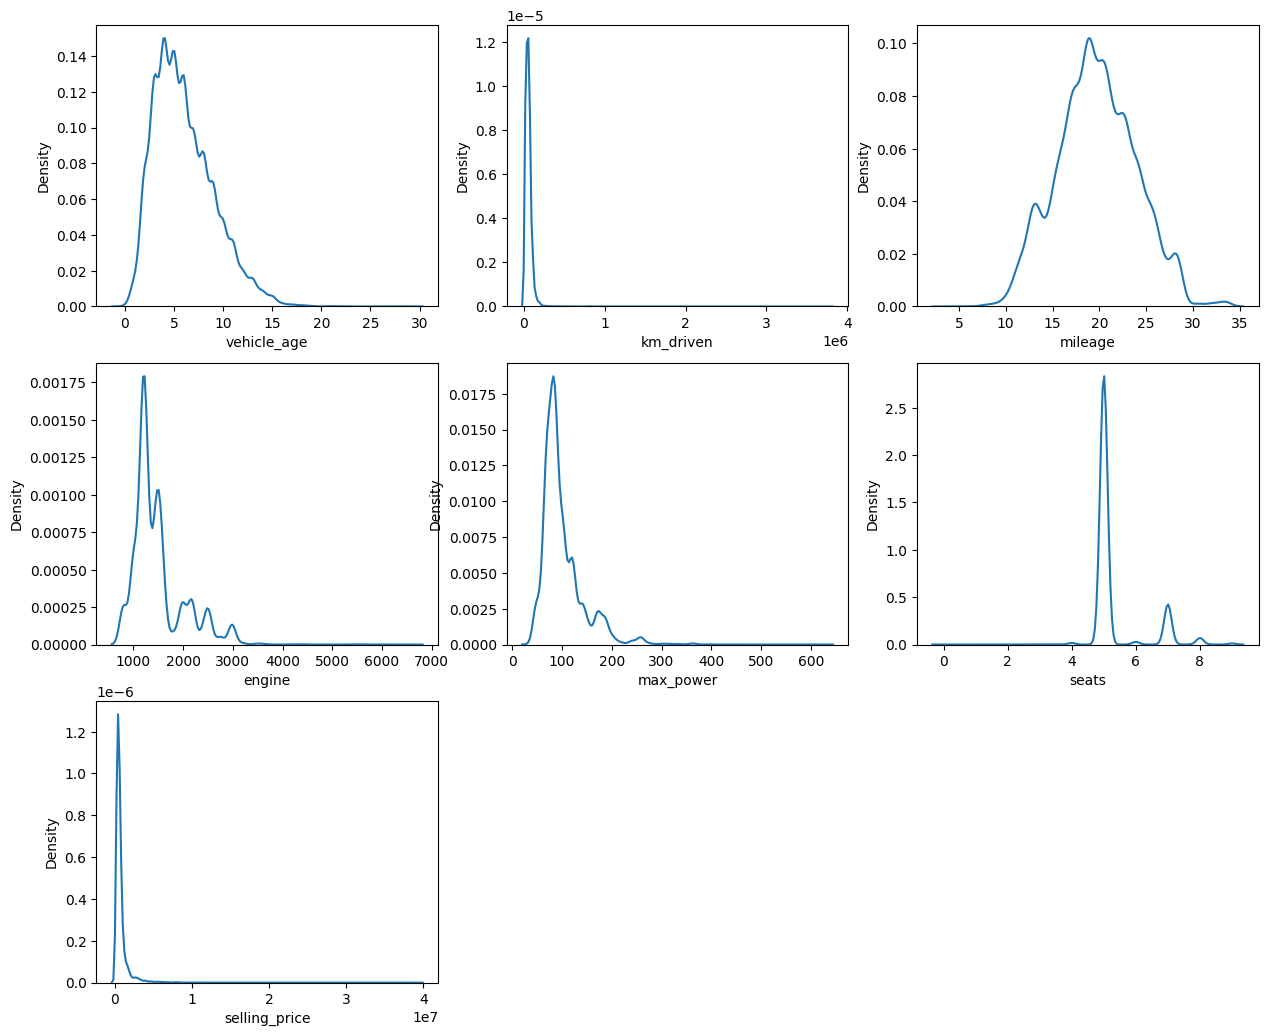

In [22]:
# Plot the density graphs of each of the numerical columns
num_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats','selling_price']
plt.figure(figsize=(15, 30))
for i in range(len(num_columns)):
    plt.subplot(7, 3, i+1) 
    sns.kdeplot(data = df[num_columns[i]])

plt.show()

## Overall Insights
- **Right-Skewed Variables:**<br>
  Variables such as **km_driven**, **selling_price**, and **max_power** exhibit significant right skewness, with most values clustered at the lower end and a few high-value outliers. Applying transformations like log or square root may help in modeling.

- **Concentrated Distributions:**<br>
  Features like **seats** and **vehicle_age** are heavily centered around common values (e.g., 5 seats, 0-10 years), reflecting consumer preferences for newer cars and mid-sized or compact models.

- **Diverse Vehicle Segments:**<br>
  The multimodal distribution of **engine** and the wide spread of **max_power** indicate that the dataset covers various vehicle categories, including compact cars, SUVs, and performance models.

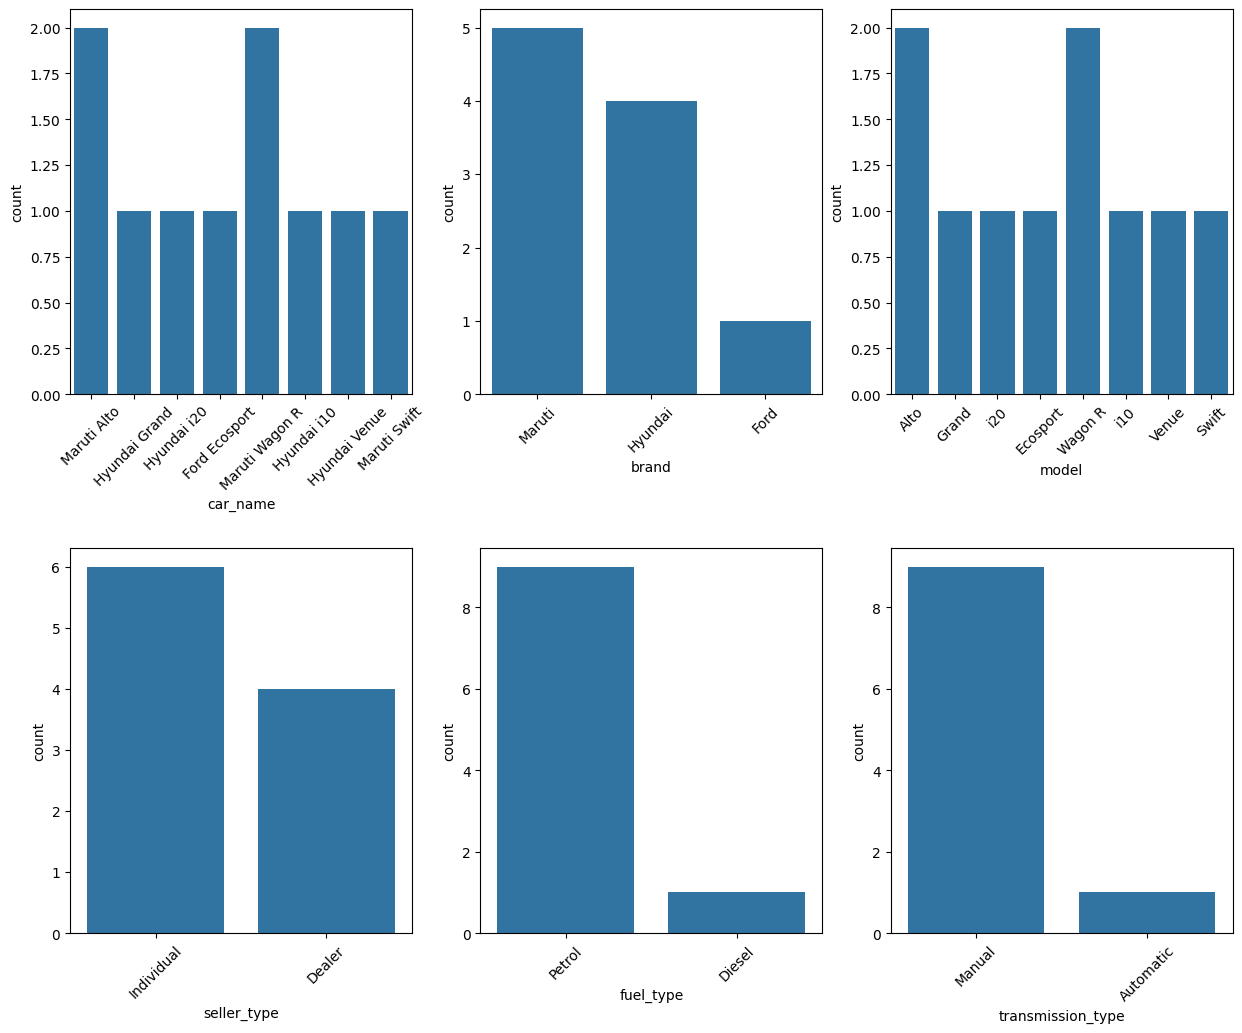

In [26]:
# Plot the countplots of each of the categorical columns
cat_columns = ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']
plt.figure(figsize=(15, 12))
for i in range(len(cat_columns)):
    plt.subplot(2, 3, i+1)
    plt.xticks(rotation = 45)
    sns.countplot(x = df[cat_columns[i]].head(10))
plt.subplots_adjust(hspace=0.4)
plt.show()

## Insights
- The data is biased toward **petrol-powered** vehicles with **manual transmissions**, primarily sold by individuals.
- **Maruti** stands out as the leading brand, with models like the **Maruti Alto** and **Hyundai Grand** being the most common.
- **Diesel vehicles** and **automatic transmissions** appear less frequent, suggesting lower availability or demand in this dataset.

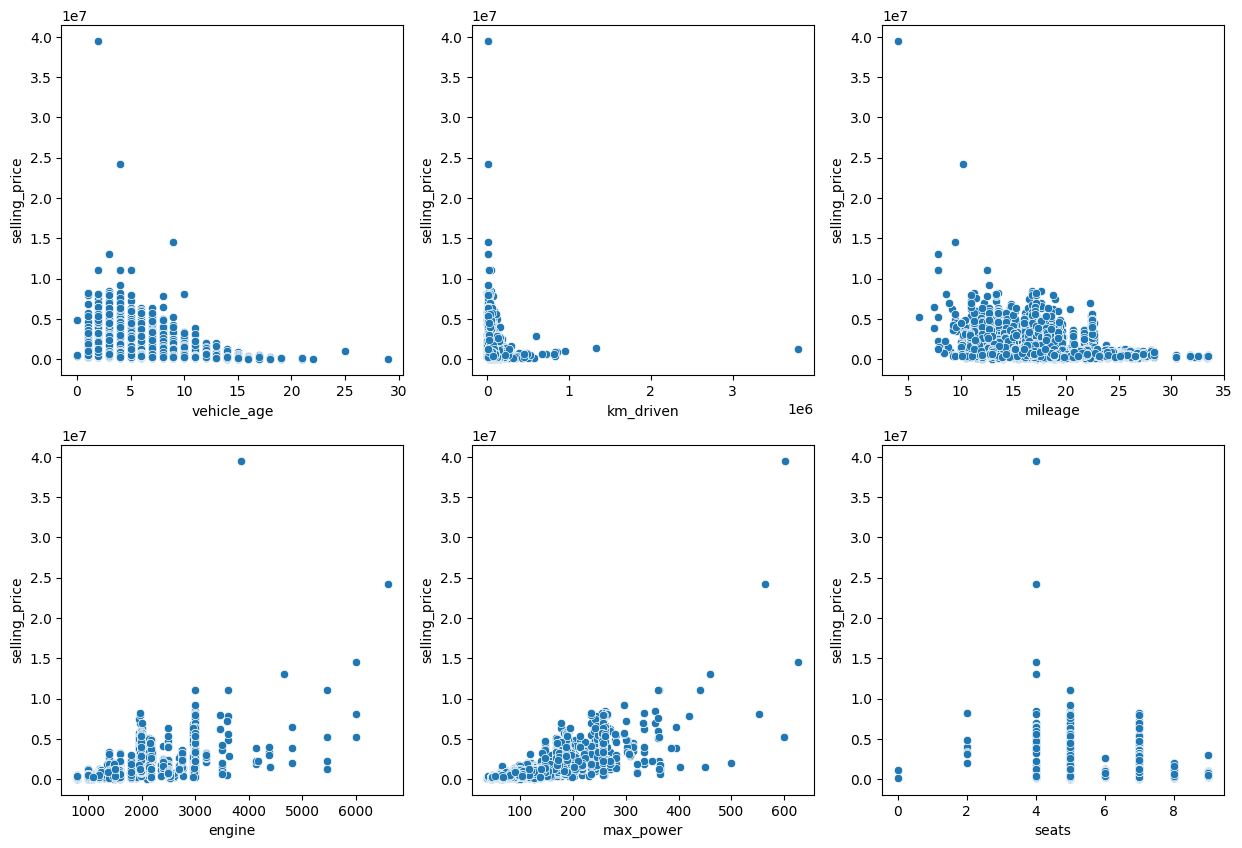

In [28]:
#Bivariate Analysis
# Plot the relationship of each variable with the selling price (Target variable)
numerical_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

plt.figure(figsize=(15, 10))
for i in range(len(numerical_columns)):
    plt.subplot(2, 3, i+1) 
    sns.scatterplot(data = df, x = numerical_columns[i], y = 'selling_price')

plt.show()

## Interpretation of the Scatterplots
### 1. Vehicle Age vs Selling Price
   - **Observation**: Older cars generally sell for lower prices, indicating a negative correlation.
   - **Outliers**: Some aged vehicles command unusually high prices.
### 2. Kilometers Driven vs Selling Price
   - **Observation**: Cars with fewer kilometers driven are priced higher, while cars with high mileage are clustered at lower prices.
   - **Clusters**: A distinct grouping appears at low mileage and low price points.
### 3. Mileage vs Selling Price
   - **Observation**: No strong correlation is evident, though lower-mileage cars tend to hover around average prices.
### 4. Engine vs Selling Price
   - **Observation**: A positive relationship exists, with larger engine capacities corresponding to higher selling prices.
### 5. Max Power vs Selling Price
   - **Observation**: Higher power output generally aligns with higher prices.
   - **Outliers**: Some vehicles show extremely high power values.
### 6. Seats vs Selling Price
   - **Observation**: No distinct pattern emerges, as most cars have 4 or 5 seats, and seating capacity doesn’t significantly impact pricing.

In [29]:
# Multi-variate analysis - to check the correlation between all the combination of numerical features
num_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats','selling_price']
df[num_columns].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


<Axes: >

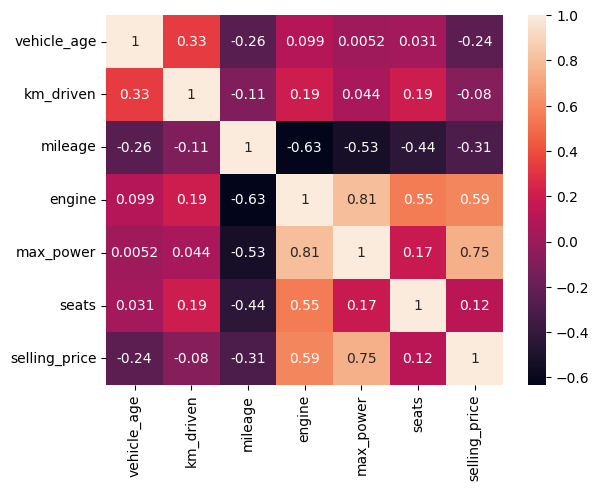

In [31]:
# Plot the heatmap of the correlation between each of the numerical features
sns.heatmap(data = df[num_columns].corr(), annot=True)

## Insights
### The Strongest Relationships:
   1. **Max Power vs Selling Price (0.75)**:
      - Selling price is strongly correlated with max power, indicating that vehicles with higher power output are priced significantly higher.
   2. **Engine vs Selling Price (0.59)**:
      - A positive correlation suggests that larger engine capacities contribute to higher vehicle prices.
### The Weakest Relationships:
   1. **Seats vs Selling Price (0.12)**:
      - The number of seats has little impact on selling price, showing a very weak positive correlation.
   2. **Km Driven vs Selling Price (-0.08)**:
      - A negligible negative relationship implies that the number of kilometers driven minimally affects the selling price..
   3. **Mileage vs Selling Price (-0.31)**:
      - A weak negative correlation suggests that vehicles with better mileage are often lower-priced, likely due to smaller or less powerful models being more fuel-efficient.

In [32]:
# Create a copy of the dataframe to model the data
model_data = df.copy()
model_data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [38]:
# Drop the noise in the data (unwanted columns)
model_data.drop(labels=['car_name', 'brand', 'model', 'seller_type'], axis=1, inplace=True, errors='ignore')

In [39]:
model_data.head()

,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Diesel,Manual,22.77,1498,98.59,5,570000


In [40]:
# Convert the categorical variables into a set of binary(0,1) 
model_data = pd.get_dummies(model_data, dtype = int)
model_data.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0,0,0,0,1,0,1
1,5,20000,18.90,1197,82.00,5,550000,0,0,0,0,1,0,1
2,11,60000,17.00,1197,80.00,5,215000,0,0,0,0,1,0,1
3,9,37000,20.92,998,67.10,5,226000,0,0,0,0,1,0,1
4,6,30000,22.77,1498,98.59,5,570000,0,1,0,0,0,0,1


In [41]:
# Drop the column of selling_price from the independent variable
X = model_data.drop('selling_price', axis=1)
X.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,0,0,0,0,1,0,1
1,5,20000,18.90,1197,82.00,5,0,0,0,0,1,0,1
2,11,60000,17.00,1197,80.00,5,0,0,0,0,1,0,1
3,9,37000,20.92,998,67.10,5,0,0,0,0,1,0,1
4,6,30000,22.77,1498,98.59,5,0,1,0,0,0,0,1


In [42]:
# For getting the target variable we will just have selling_price
Y = model_data['selling_price']
Y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

In [43]:
# Divide data into Train & Test data
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.2)
train_X
# 80% data goes to Train & 20% goes to Test

,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
5860,4,30000,17.80,1497,117.3,5,0,0,0,0,1,0,1
9329,15,124000,19.70,796,46.3,5,0,0,0,0,1,0,1
7012,3,34000,28.40,1248,74.0,5,0,1,0,0,0,1,0
2233,6,40000,21.76,1995,188.0,5,0,1,0,0,0,1,0
11772,5,120000,15.40,2523,75.0,9,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,11,94000,12.80,2494,102.0,8,0,1,0,0,0,0,1
3857,13,100000,17.70,1497,78.0,5,0,0,0,0,1,0,1
11833,5,68000,26.59,1248,74.0,5,0,1,0,0,0,0,1
13127,4,95000,21.50,1497,108.5,5,0,1,0,0,0,0,1


In [50]:
# Applying LinearRegression for training the model
Regressor = LinearRegression().fit(train_X,train_Y)
Regressor

LinearRegression()

In [51]:
# Getting the predictions
Prediction = Regressor.predict(test_X)
print(Prediction)
print(test_Y)

[ 905448.72800448  285214.70844089  582126.43797919 ...  545685.30655273
 1183235.94750724  809040.42683571]
5006      550000
1517      299000
12696     380000
3928      370000
3722     3900000
          ...   
14125     690000
8521      280000
8326      265000
11655    1090000
9628      550000
Name: selling_price, Length: 3083, dtype: int64


In [52]:
test_X['predicted_sales_price'] = Prediction

test_X['actual_price'] = test_Y

# Calculate the difference between the predicted sales price and the actual price
test_X['difference'] = test_X['predicted_sales_price'] - test_X['actual_price']

# Display the predicted sales price, actual price and the difference
test_X[['predicted_sales_price', 'actual_price', 'difference']]

,predicted_sales_price,actual_price,difference
5006,9.054487e+05,550000,355448.728004
1517,2.852147e+05,299000,-13785.291559
12696,5.821264e+05,380000,202126.437979
3928,2.766907e+05,370000,-93309.299715
3722,3.244887e+06,3900000,-655113.434057
...,...,...,...
14125,7.912483e+05,690000,101248.262366
8521,1.267383e+05,280000,-153261.718803
8326,5.456853e+05,265000,280685.306553
11655,1.183236e+06,1090000,93235.947507


In [53]:
# Calculate the root mean squared error for the prediction
mse = []
mse.append(mean_squared_error(y_true = test_Y, y_pred = Prediction))

rmse = []
rmse.append(np.sqrt(mse[0]))

print(f"The Root Mean Squared Error is : {rmse[0].round(2)}")

The Root Mean Squared Error is : 546942.67
